In [1]:
# 필요한 package 불러오기
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import matplotlib.axis as ax
import statistics

In [2]:
!git clone https://github.com/yun-seon/DX-Training-Hyundai-0707.git

Cloning into 'DX-Training-Hyundai-0707'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


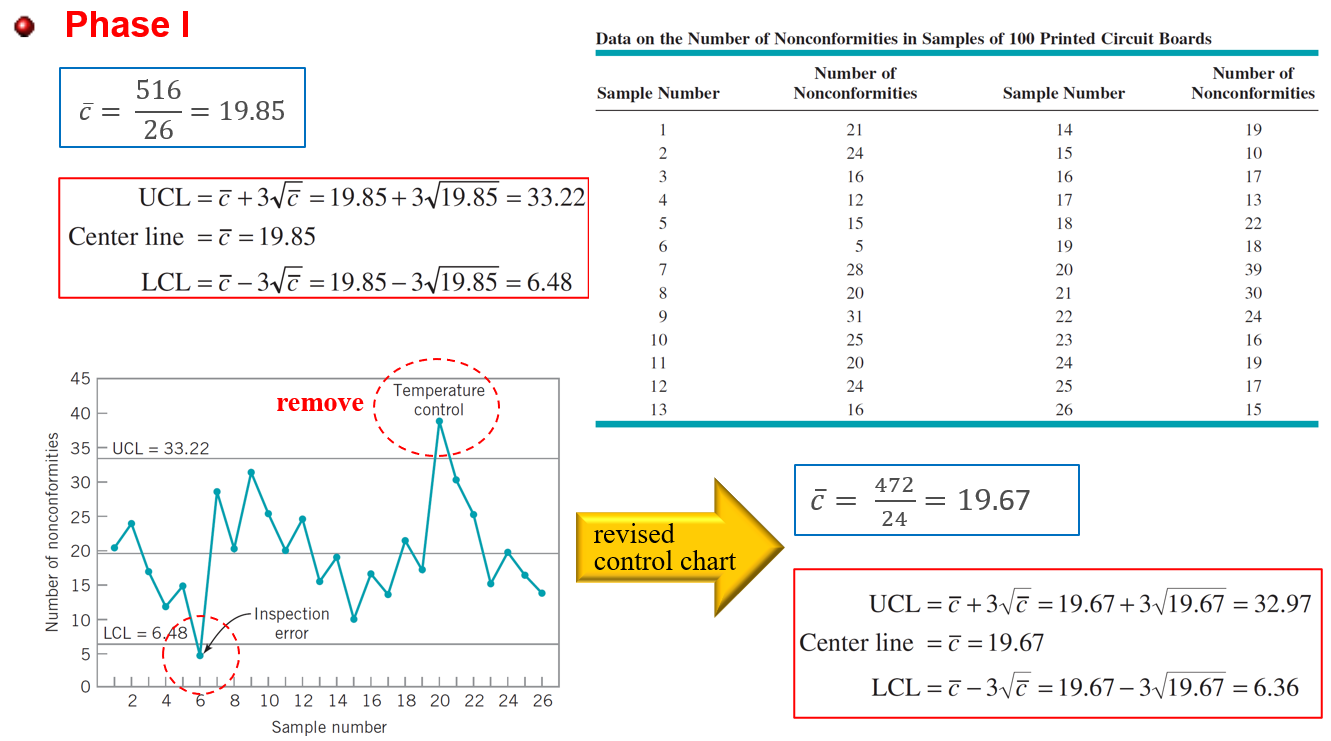

## (1) Example Data 활용하여 "c chart" 구축

In [3]:
# data 불러오기

ex = pd.read_csv("/content/DX-Training-Hyundai-0707/Data/example_c_chart.csv")
data = ex   
data.head()

,sample,value
0,100,21
1,100,24
2,100,16
3,100,12
4,100,15


In [4]:
# dataframe 형태를 변환

if isinstance(data, pd.DataFrame):
    data = data.values
data[:6]

array([[100,  21],
       [100,  24],
       [100,  16],
       [100,  12],
       [100,  15],
       [100,   5]])

In [5]:
# c chart 구성을 위한 setting 값 설정

title_ = "c chart"
plt.style.use('grayscale')
mpl.rcParams['lines.markersize'] = 4

size = len(data[0]) 
layers = []
points = None
summary = []
size = size-1

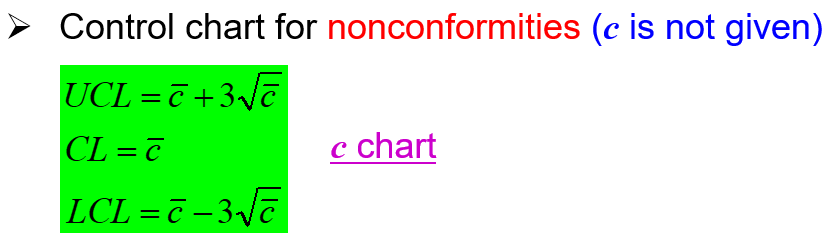

In [6]:
# Control Chart plotting 함수

def plot(data, size, newdata=None):

    data = data.T
    cbar = np.mean(data)

    lcl = cbar - 3 * np.sqrt(cbar)
    ucl = cbar + 3 * np.sqrt(cbar)

    return (data, cbar, lcl, ucl, title_)

In [7]:
# 데이터 값 구분에 따른 빈도수로 표현

size = size - 1
sizes, data = data.T

print("size: \n", sizes)
print("data: \n", data)

size: 
 [100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100]
data: 
 [21 24 16 12 15  5 28 23 31 25 20 24 16 19 10 17 13 22 18 39 30 24 16 19
 17 15]


In [8]:
# 데이터를 count로 표현

data2 = data / sizes
cbar = np.mean(data2)

print("count data: \n", data2)
print("cbar: ", cbar)
print("mean of sizes: ", np.mean(sizes))

count data: 
 [0.21 0.24 0.16 0.12 0.15 0.05 0.28 0.23 0.31 0.25 0.2  0.24 0.16 0.19
 0.1  0.17 0.13 0.22 0.18 0.39 0.3  0.24 0.16 0.19 0.17 0.15]
cbar:  0.19961538461538458
mean of sizes:  100.0


In [9]:
# plot 함수 통해 UCL, LCL 계산

result= plot(data, size, newdata=None)
data = result[0]
cbar = result[1]
lcl = result[2]
ucl = result[3]
title = _title = result[4]

print("count data: \n", data2)
print("cbar: ", cbar)
print("Lower control limit (LCL): ", lcl)
print("Upper control limit (UCL): ", ucl)
print("Chart title: ", title_)

count data: 
 [0.21 0.24 0.16 0.12 0.15 0.05 0.28 0.23 0.31 0.25 0.2  0.24 0.16 0.19
 0.1  0.17 0.13 0.22 0.18 0.39 0.3  0.24 0.16 0.19 0.17 0.15]
cbar:  19.96153846153846
Lower control limit (LCL):  6.558037196799976
Upper control limit (UCL):  33.36503972627695
Chart title:  c chart


In [10]:
values = data
center = cbar
num = len(data) # Control Limit (CL) : c bar

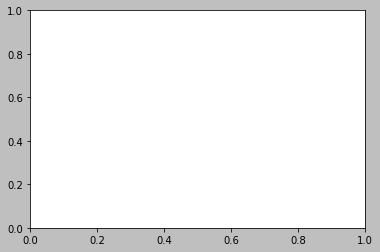

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # suplot 추가 가능
#ax.yaxis.tick_right() # 축을 오른쪽에 표현하고자 할 때, 사용 가능

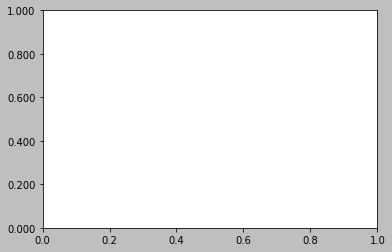

In [12]:
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f')) # 축의 수치를 소수점 셋째자리까지 표현
fig

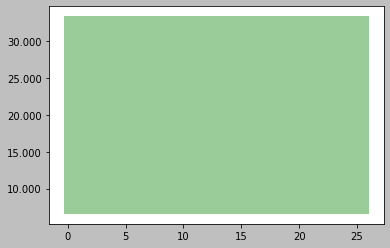

In [13]:
ax.fill_between([-0.3, num], [lcl, lcl], [ucl, ucl], facecolor='green', alpha=0.4) # 영역 색 표시
fig

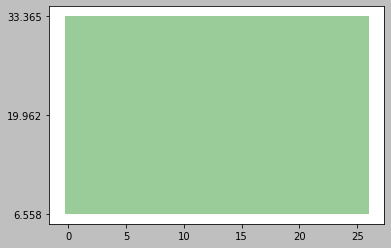

In [14]:
ax.yaxis.set_ticks([lcl, center, ucl]) # ULC, CL, LCL의 수치만을 표현하도록 설정
fig

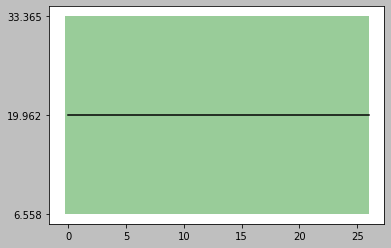

In [15]:
ax.plot([0, num], [center, center], 'k-') # Center (CL, c bar) 표시
fig

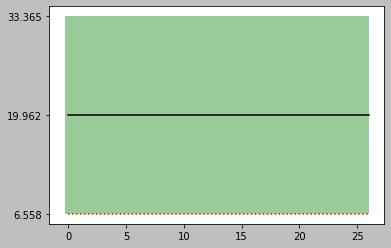

In [16]:
ax.plot([0, num], [lcl, lcl], 'r:') # LCL 붉은 점선으로 표시
fig

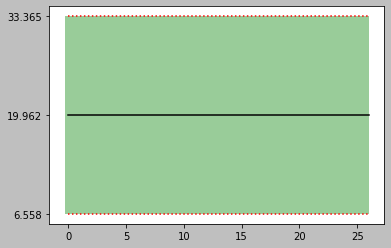

In [17]:
ax.plot([0, num], [ucl, ucl], 'r:') # UCL 붉은 점선으로 표시
fig

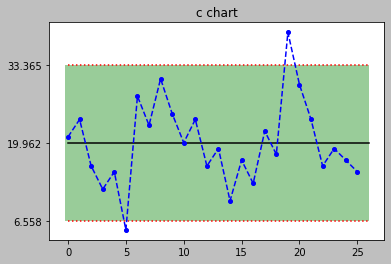

In [18]:
ax.plot(values, 'bo--') # 측정값을 파란색으로 plotting
ax.set_title(title)
fig

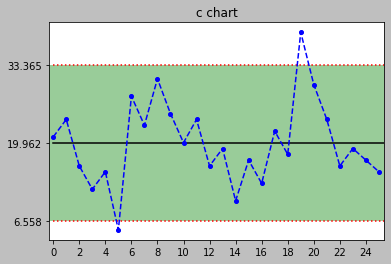

In [19]:
# X 축 설정 변경
new_xlim = [0, num]
ax.set_xlim([0, num] + np.array((-0.3, -0.6)))
ax.xaxis.set_ticks(np.arange(*new_xlim, 2))
fig

## (2) Simulation Data 활용하여 "p chart" Fitting

In [20]:
# Simulation data 생성

# Set random seed
np.random.seed(42)

# Create dummy data
c = {'defects':np.random.randint(0,5,10).tolist(),
    'group_size':np.repeat(10,10).tolist()}

# Convert data to data frame
c = pd.DataFrame(c)
c['defects'][4] = 0
c['defects'][7] = 9
c

,defects,group_size
0,3,10
1,4,10
2,2,10
3,4,10
4,0,10
5,1,10
6,2,10
7,9,10
8,2,10
9,4,10


In [21]:
cl = statistics.mean(c['defects'])
ucl = cl + 3 * np.sqrt(cl)
lcl = max(0, cl - 3 * np.sqrt(cl))

print("Control Limit: ", cl)
print("Upper Control Limit: ", ucl)
print("Lower Control Limit: ", lcl)

Control Limit:  3.1
Upper Control Limit:  8.382045058497702
Lower Control Limit:  0


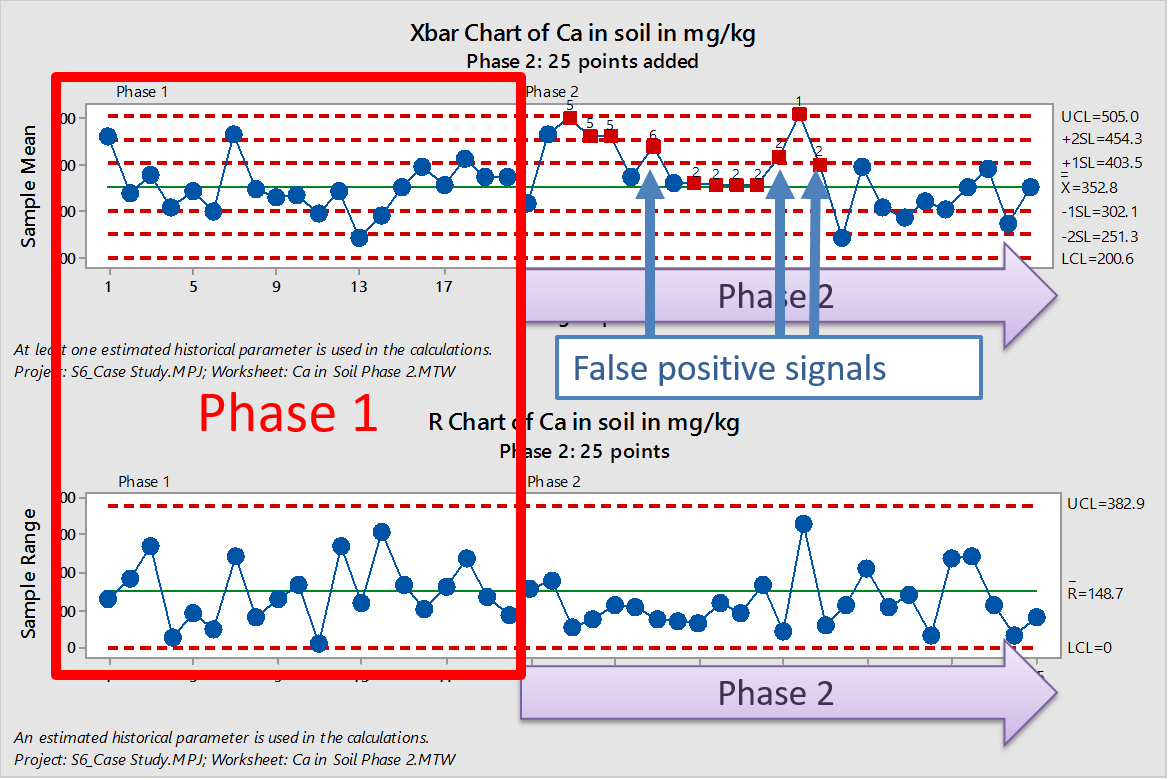

> Phase I (* Phase 2는 p/np chart와 동일하게 반복)

In [22]:
print("Control Limit: ", cl)
print("Upper Control Limit: ", ucl)
print("Lower Control Limit: ", lcl)

Control Limit:  3.1
Upper Control Limit:  8.382045058497702
Lower Control Limit:  0


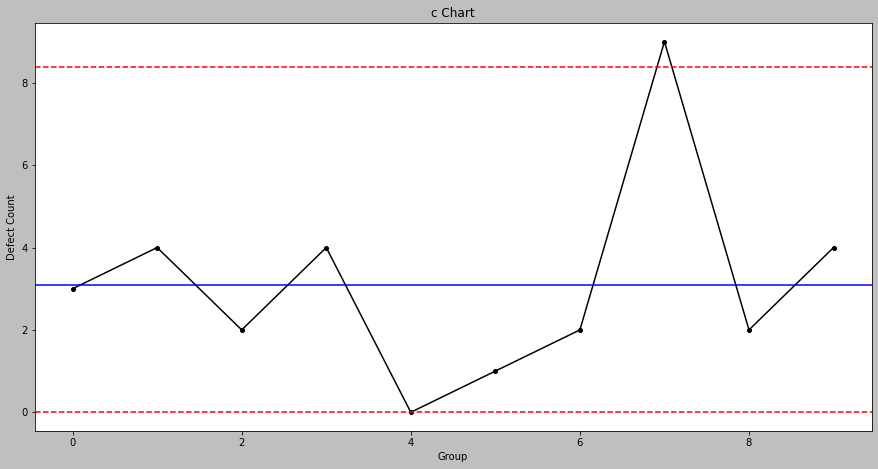

In [23]:
# c chart 그래프 시각화

plt.figure(figsize=(15,7.5))
plt.plot(c['defects'], linestyle='-', marker='o', color='black')
plt.axhline(ucl, color='red', linestyle='dashed')
plt.axhline(lcl, color='red', linestyle='dashed')

plt.axhline(cl, color='blue')
plt.title('c Chart')
plt.xlabel('Group')
plt.ylabel('Defect Count')
plt.show()

In [24]:
# Phase I 단계에서 Control Limit을 벗어나는 점 확인

i = 0
control = True
for group in c['defects']:
    if group > ucl or group < lcl:
        print('Group', i, 'out of defects cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

Group 7 out of defects cotrol limits!


In [25]:
# Control limit을 벗어나는 7번 데이터 삭제

new_c = c.copy()
new_c = new_c.drop([7])
new_c

,defects,group_size
0,3,10
1,4,10
2,2,10
3,4,10
4,0,10
5,1,10
6,2,10
8,2,10
9,4,10


In [26]:
# Control Limit을 벗어나는 점을 제외하고, Control Limit 다시 연산

new_cl = statistics.mean(new_c['defects'])
new_ucl = new_cl+3*np.sqrt(new_cl)
new_lcl = max(0, new_cl-3*np.sqrt(new_cl))

print("Control Limit: ", new_cl)
print("Upper Control Limit: ", new_ucl)
print("Lower Control Limit: ", new_lcl)

Control Limit:  2.4444444444444446
Upper Control Limit:  7.134860204267874
Lower Control Limit:  0


In [27]:
# Phase I 단계에서 Control Limit을 벗어나는 점 확인
# 모든 점이 Control Limit 내에 존재함을 확인

i = 0
control = True
for group in new_c['defects']:
    if group > new_ucl or group < new_lcl:
        print('Group', i, 'out of defects cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


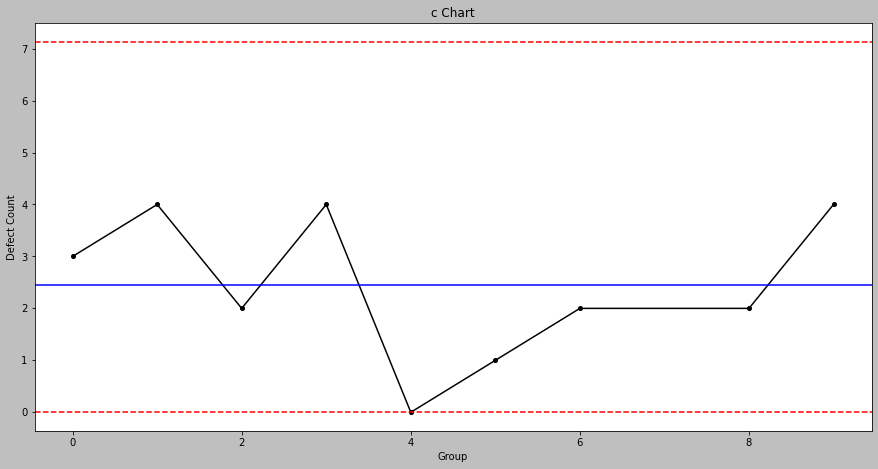

In [28]:
# Control Limit을 벗어나는 점 제외한 후, Phase I Control Chart 구축

plt.figure(figsize=(15,7.5))
plt.plot(new_c['defects'], linestyle='-', marker='o', color='black')
plt.axhline(new_ucl, color='red', linestyle='dashed')
plt.axhline(new_lcl, color='red', linestyle='dashed')
plt.axhline(new_cl, color='blue')
plt.title('c Chart')
plt.xlabel('Group')
plt.ylabel('Defect Count')
plt.show()